<a href="https://colab.research.google.com/github/snehuman/Malicious-urls---colab/blob/main/urls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries



In [ ]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
#libraires and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import re
from urllib.parse import urlparse
from googlesearch import search
import os.path
from tld import get_tld
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Data pre-processing

In [ ]:
# getting the dataset, from uploading files
url = pd.read_csv('/content/malicious_phish.csv')
print(url)

                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


In [ ]:
# getting the shape of the dataframe
url.shape

(651191, 2)

In [ ]:
#getting initial 5 values
url.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
#getting the datatype and non null count
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
#dropping the NULL values from the dataset
url.dropna()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
#rechecking and getting sum of the null values
url.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
# getting counts of kind of urls
url["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# Graph and Wordcloud

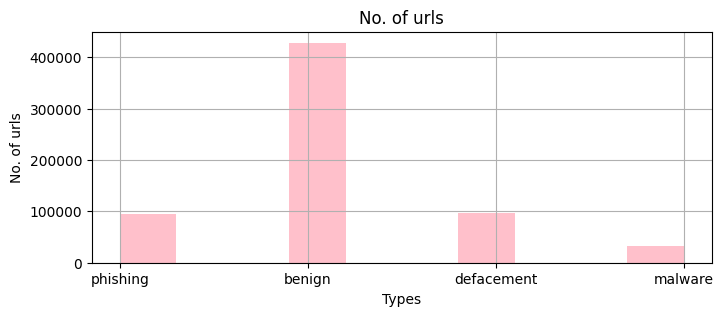

In [ ]:
#histogram for getting a visual representation of the no. of urls
plt.figure(figsize=(8,3))
plt.hist(url['type'],  color='pink')
plt.title('No. of urls')
plt.xlabel('Types')
plt.ylabel('No. of urls')
plt.grid(True)

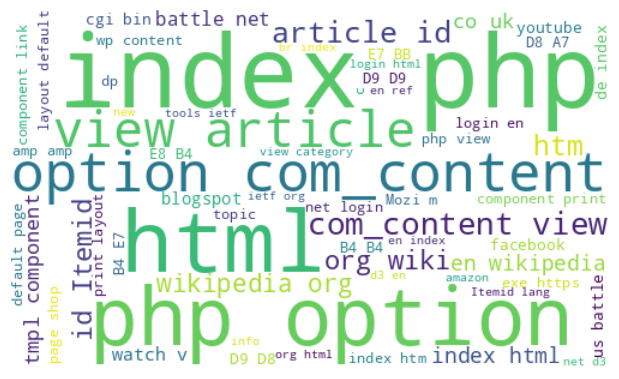

In [ ]:
# worldcloud for original url
wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(' '.join(url['url']))


# plot the WordCloud image
plt.figure(figsize = (6,5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

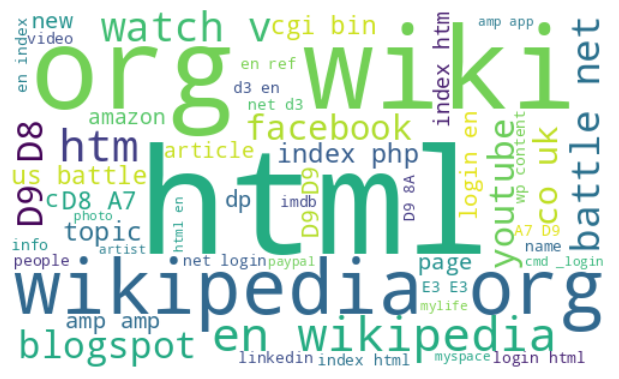

In [ ]:
# 1st getting the only benign urls, by spliting the original table
# then making a wordcloud so that we can get the most used words in case of benign urls

grouped = url.groupby(url.type)
df1 = grouped.get_group("benign")

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df1['url']))


# plot the WordCloud image
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

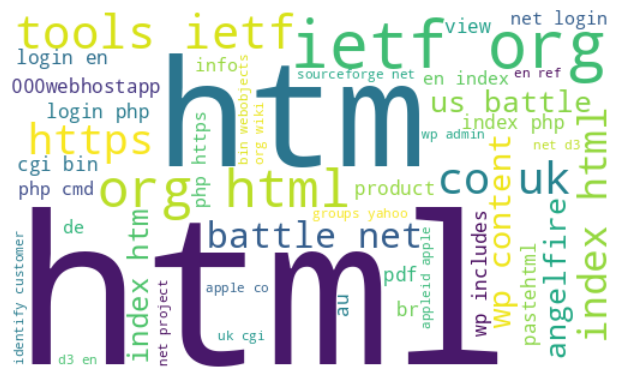

In [ ]:
# wordcloud for phishing urls

grouped = url.groupby(url.type)
df1 = grouped.get_group("phishing")

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df1['url']))


# plot the WordCloud image
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

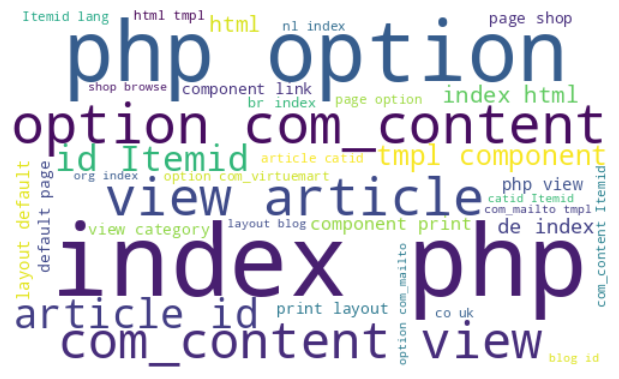

In [ ]:
# wordcloud for defacement urls

grouped = url.groupby(url.type)
df1 = grouped.get_group("defacement")

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df1['url']))


# plot the WordCloud image
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

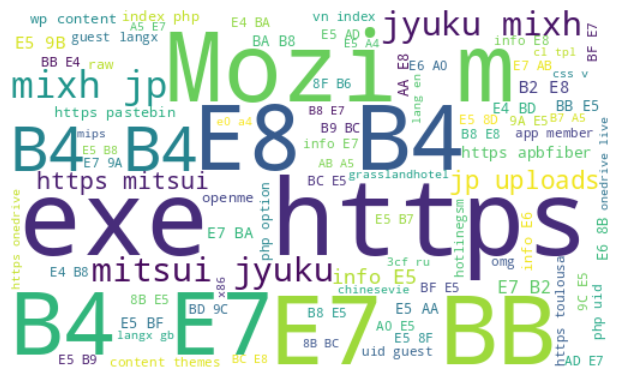

In [ ]:
# wordcloud for malware urls

grouped = url.groupby(url.type)
df1 = grouped.get_group("malware")

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df1['url']))


# plot the WordCloud image
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Addings Coulmns

In [ ]:
#tokenisation
from sklearn.feature_extraction.text import TfidfVectorizer
def makeTokens(f):
  tkns_byslash = str(f.encode('utf-8')).split('/')
  total_tokens = []
  for i in tkns_byslash:
    tokens = str(i).split('-')
    tkns_bydot = []
    for j in range(0, len(tokens)):
      temp_tokens = str(tokens[j]).split('.')
      tkns_bydot = tkns_bydot + temp_tokens
      total_tokens = total_tokens + tokens + tkns_bydot
  total_tokens = list(set(total_tokens))
  return total_tokens


In [ ]:
vect = TfidfVectorizer(tokenizer=makeTokens)

In [ ]:
# length of the url
# apply function of pandas
def url_length(url):
    return len(url)
url['url_len'] = url['url'].apply(lambda x: url_length(str(x)))
url.head()

,url,type,url_len
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [ ]:
# counting of IP address
def ip_add(url):
    pattern = r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' \
              r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|' \
              r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|' \
              r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'

    match = re.search(pattern, url)
    if match:
        return 1
    else:
        return 0
url['have_ip']  = url['url'].apply(lambda x: ip_add(x))
url.head()

,url,type,url_len,have_ip
0,br-icloud.com.br,phishing,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0


In [ ]:
# if the url is abnormal or not
# using urllib.parse
def abnormal(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    if hostname:
        hostname = str(hostname)
        match = re.search(hostname, url)
        if match:
            return 1
    return 0

url['abnormal_url'] = url['url'].apply(lambda x: abnormal(x))
url.head()

,url,type,url_len,have_ip,abnormal_url
0,br-icloud.com.br,phishing,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1


In [ ]:
#counting number of dots
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
url['count_of_dots'] = url['url'].apply(lambda i: count_dot(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots
0,br-icloud.com.br,phishing,16,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2


In [ ]:
#google index
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
url['google_index'] = url['url'].apply(lambda i: google_index(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index
0,br-icloud.com.br,phishing,16,0,0,2,1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1


In [ ]:
# counting letters, digits and special character
# for counting letters
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

url['letters_count'] = url['url'].apply(lambda x: count_letters(x))

#counting digits
def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

url['digits_count']  = url['url'].apply(lambda x: count_digits(x))

#counting special characters
def count_special_chars(url):
    special_chars = "!@#$%^&*()_+-=[]{};:,.<>/?`~|"
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

url['special_chars_count']  = url['url'].apply(lambda x: count_special_chars(x))

url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14


In [ ]:
# counting www cuz they are generally safe
def count_www(url):
    url.count('www')
    return url.count('www')
url['count-www'] = url['url'].apply(lambda i: count_www(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0


In [ ]:
# no of directories; presence of multiple dir suggest maliciousness in url
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
url['count_dir'] = url['url'].apply(lambda i: no_of_dir(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1


In [ ]:
# count of //
# // indicates maliciousness in url
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
url['count_embed_domian'] = url['url'].apply(lambda i: no_of_embed(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0


In [ ]:
# for checking if the url uses shortening services or not
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

url['short_url'] = url['url'].apply(lambda i: shortening_service(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0


In [ ]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)
url['hostname_length'] = url['url'].apply(lambda i: hostname_length(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url,hostname_length
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0,23


In [ ]:
# sus words
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
url['sus_url'] = url['url'].apply(lambda i: suspicious_words(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url,hostname_length,sus_url
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0,23,0


In [ ]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
url['fd_length'] = url['url'].apply(lambda i: fd_length(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url,hostname_length,sus_url,fd_length
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0,0,0,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0,0,0,7
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0,21,0,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0,23,0,9


In [ ]:
#Length of Top Level Domain
url['tld'] = url['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
url['tld_length'] = url['tld'].apply(lambda i: tld_length(i))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url,hostname_length,sus_url,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0,0,0,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0,0,0,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0,0,0,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0,21,0,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0,23,0,9,net,3


In [ ]:
# secure
def secure_http(url):
    scheme = urlparse(url).scheme
    if scheme == 'https':
        return 1
    else:
        return 0
url['secure_http']  = url['url'].apply(lambda x: secure_http(x))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,count-www,count_dir,count_embed_domian,short_url,hostname_length,sus_url,fd_length,tld,tld_length,secure_http
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,0,0,0,0,0,0,0,None,-1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,0,2,0,0,0,0,5,None,-1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,0,3,0,0,0,0,7,None,-1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,1,1,0,0,21,0,9,be,2,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,0,1,0,0,23,0,9,net,3,0


In [ ]:
def extract_primary_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
url['primary_domain'] = url['url'].apply(lambda x: extract_primary_domain(x))
url.head()

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,...,count_dir,count_embed_domian,short_url,hostname_length,sus_url,fd_length,tld,tld_length,secure_http,primary_domain
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,...,0,0,0,0,0,0,None,-1,0,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,...,2,0,0,0,0,5,None,-1,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,...,3,0,0,0,0,7,None,-1,0,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,...,1,0,0,21,0,9,be,2,0,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,...,1,0,0,23,0,9,net,3,0,adventure-nicaragua.net


In [ ]:
#complete table
url.head(5)

,url,type,url_len,have_ip,abnormal_url,count_of_dots,google_index,letters_count,digits_count,special_chars_count,...,count_dir,count_embed_domian,short_url,hostname_length,sus_url,fd_length,tld,tld_length,secure_http,primary_domain
0,br-icloud.com.br,phishing,16,0,0,2,1,13,0,3,...,0,0,0,0,0,0,None,-1,0,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,2,1,29,1,5,...,2,0,0,0,0,5,None,-1,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,2,1,25,1,5,...,3,0,0,0,0,7,None,-1,0,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,3,1,63,7,18,...,1,0,0,21,0,9,be,2,0,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,2,1,199,22,14,...,1,0,0,23,0,9,net,3,0,adventure-nicaragua.net


# EXPLORATORY DATA ANALYSIS

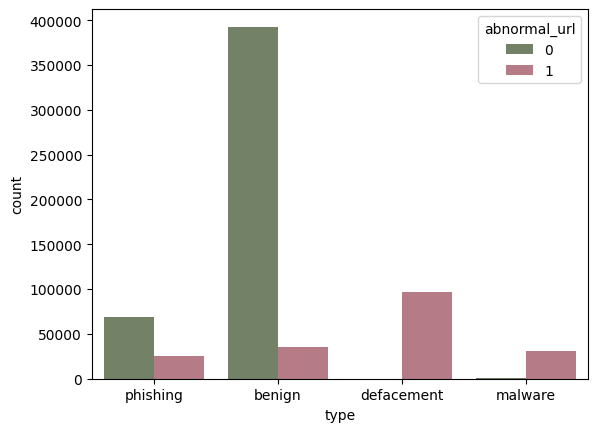

In [ ]:
sns.countplot(data = url, x = 'type', hue = 'abnormal_url',   palette =  ['#738561' , '#BF7180' ] )
plt.show()

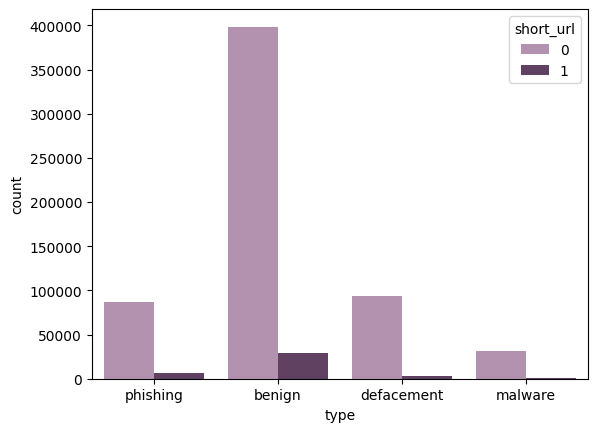

In [ ]:
sns.countplot(data = url, x = 'type', hue = 'short_url',   palette =  ['#B88DB5' , '#653B68' ] )
plt.show()

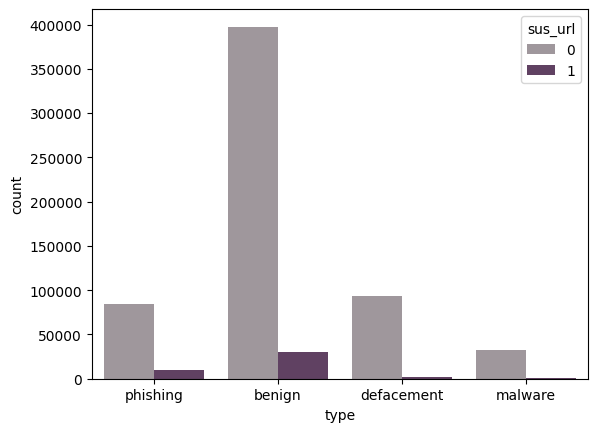

In [ ]:
sns.countplot(data = url, x = 'type', hue = 'sus_url',   palette =  ['#A0969C' , '#653B68' ] )
plt.show()

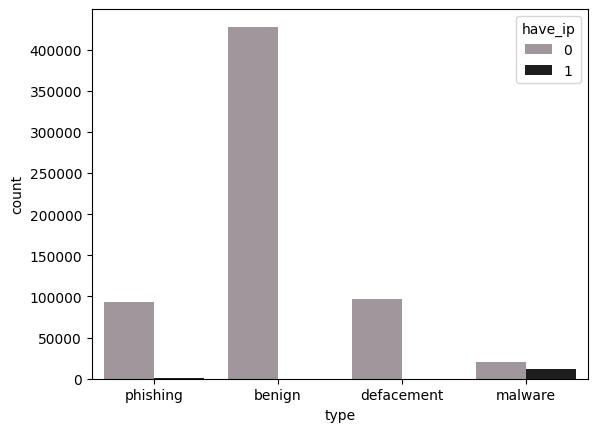

In [ ]:
sns.countplot(data = url, x = 'type', hue = 'have_ip',   palette =  ['#A0969C' , '#1E1E1E' ] )
plt.show()

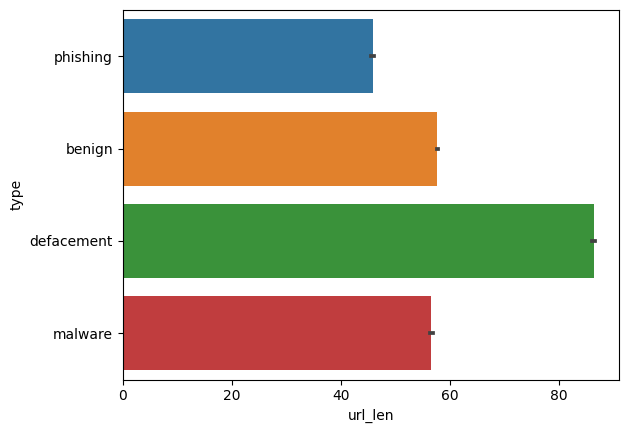

In [ ]:
sns.barplot(data = url, x = 'url_len', y = 'type' )
plt.show()

In [ ]:
url.shape

(651191, 21)

In [ ]:
url.columns

Index(['url', 'type', 'url_len', 'have_ip', 'abnormal_url', 'count_of_dots',
       'google_index', 'letters_count', 'digits_count', 'special_chars_count',
       'count-www', 'count_dir', 'count_embed_domian', 'short_url',
       'hostname_length', 'sus_url', 'fd_length', 'tld', 'tld_length',
       'secure_http', 'primary_domain'],
      dtype='object')

In [ ]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   url                  651191 non-null  object
 1   type                 651191 non-null  object
 2   url_len              651191 non-null  int64 
 3   have_ip              651191 non-null  int64 
 4   abnormal_url         651191 non-null  int64 
 5   count_of_dots        651191 non-null  int64 
 6   google_index         651191 non-null  int64 
 7   letters_count        651191 non-null  int64 
 8   digits_count         651191 non-null  int64 
 9   special_chars_count  651191 non-null  int64 
 10  count-www            651191 non-null  int64 
 11  count_dir            651191 non-null  int64 
 12  count_embed_domian   651191 non-null  int64 
 13  short_url            651191 non-null  int64 
 14  hostname_length      651191 non-null  int64 
 15  sus_url              651191 non-nu

In [ ]:
url.isnull().sum()

url                         0
type                        0
url_len                     0
have_ip                     0
abnormal_url                0
count_of_dots               0
google_index                0
letters_count               0
digits_count                0
special_chars_count         0
count-www                   0
count_dir                   0
count_embed_domian          0
short_url                   0
hostname_length             0
sus_url                     0
fd_length                   0
tld                    475281
tld_length                  0
secure_http                 0
primary_domain          12217
dtype: int64

# TRAINING AND TESTING


In [ ]:
X = vect.fit_transform(url)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#label encoding
#lb_make = LabelEncoder()
#url["url_type"] = lb_make.fit_transform(url["type"])

In [ ]:
# giving them a number for identification for computer
url["url_type"] = url["type"].replace({
    'benign':1,
    'defacement':0,
    'phishing':0,
    'malware':0
});

In [ ]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = url[['url_len', 'have_ip', 'abnormal_url',
       'count_of_dots', 'letters_count', 'digits_count',
       'special_chars_count', 'count-www', 'count_dir', 'count_embed_domian',
       'short_url', 'hostname_length', 'sus_url', 'fd_length',
       'tld_length', 'secure_http']]
#Target Variable
y = url['url_type']

In [ ]:
print(y)

0         0
1         1
2         1
3         0
4         0
         ..
651186    0
651187    0
651188    0
651189    0
651190    0
Name: url_type, Length: 651191, dtype: int64


In [ ]:
X.shape

(651191, 16)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (520952, 16)
Y_train Shape : (520952,)
X_test  Shape : (130239, 16)
Y_test  Shape : (130239,)


In [ ]:
#x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=5, stratify=y)

# Split the temporary set into validation and test sets
#x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=5, stratify=y_temp)


In [ ]:
#print(f"X_train Shape : {x_train.shape}")
#print(f"Y_train Shape : {y_train.shape}")
#print(f"X_test  Shape : {x_test.shape}")
#print(f"Y_test  Shape : {y_test.shape}")
#print(f"x_val  Shape : {x_val.shape}")
#print(f"y_val  Shape : {y_val.shape}")

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(x_train.values, y_train.values)
y_pred_rf = rf.predict(x_test.values)
print(classification_report(y_test.values, y_pred_rf, target_names=['benign','malware']))
score = accuracy_score(y_test.values, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.95      0.96     44618
     malware       0.97      0.98      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.973


In [ ]:
print(precision_score(y_test.values, y_pred_rf))

0.9742789434136755


<Axes: >

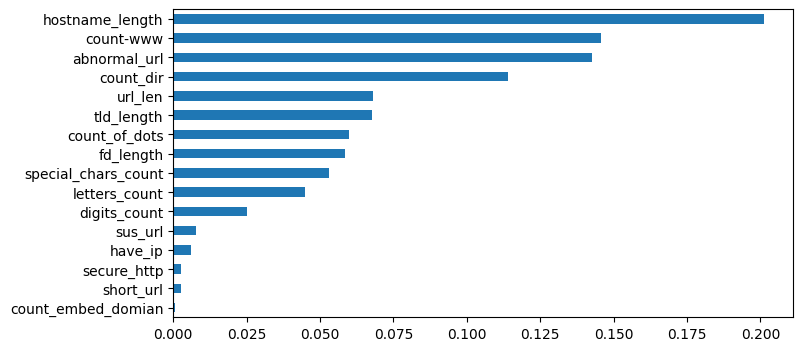

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(8, 4))

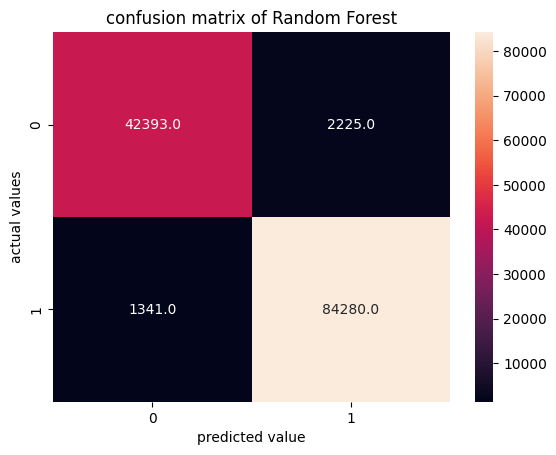

<Figure size 600x500 with 0 Axes>

In [ ]:
matrix = confusion_matrix(y_test, y_pred_rf)
matrixdf = pd.DataFrame(matrix,
                        index = ['benign', 'malware'],
                        columns = ['benign', 'malware'])
sns.heatmap(matrix, fmt = ".1f", annot = True)
plt.title('confusion matrix of Random Forest')
plt.ylabel('actual values')
plt.xlabel('predicted value')
plt.figure(figsize = (6, 5))
plt.show()

# XGBoost

In [ ]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(x_train, y_train)
y_pred_x = xgb_c.predict(x_test)
print(classification_report(y_test, y_pred_x,target_names=['benign','malware']))
score = accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.94      0.96     44618
     malware       0.97      0.99      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.97    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.971


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=3
)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
print(scores)

Accuracy: 0.96 (+/- 0.00)
[0.96002733 0.96044165 0.95940509 0.95984275 0.95879851]


In [ ]:
print(precision_score(y_test.values, y_pred_x))

0.9697905662977082


<Axes: >

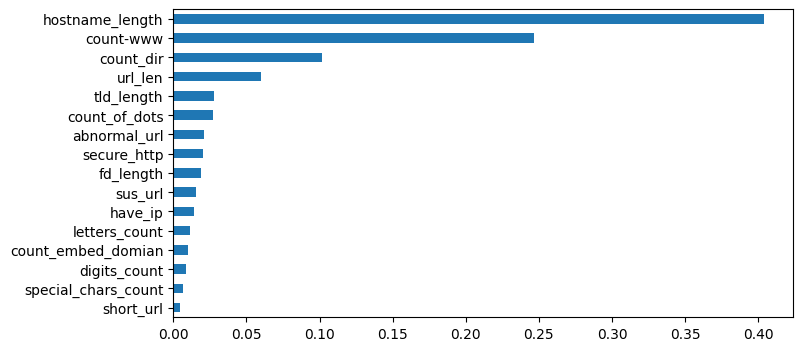

In [ ]:
feat_importances = pd.Series(xgb_c.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(8, 4))

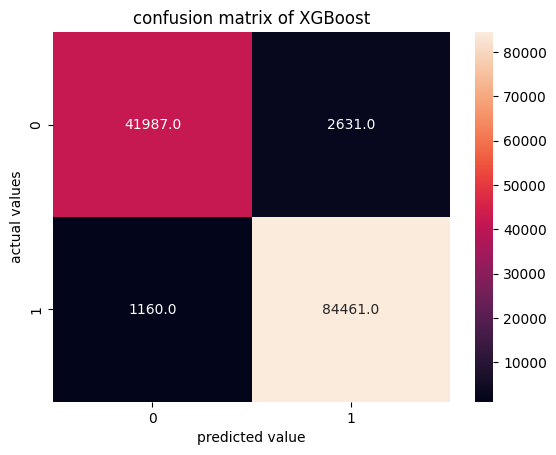

<Figure size 500x400 with 0 Axes>

In [ ]:
matrix1 = confusion_matrix(y_test, y_pred_x)
matrixdf1 = pd.DataFrame(matrix1,
                        index = ['benign', 'malware'],
                        columns = ['benign', 'malware'])
sns.heatmap(matrix1, fmt = ".1f", annot = True)
plt.title('confusion matrix of XGBoost')
plt.ylabel('actual values')
plt.xlabel('predicted value')
plt.figure(figsize = (5, 4))
plt.show()

# Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(x_train.values, y_train.values).predict(x_test.values)
print(classification_report(y_test.values, y_pred_NB,target_names = ['benign', 'malware']))
score = accuracy_score(y_test.values, y_pred_NB)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.81      0.75      0.78     44618
     malware       0.87      0.91      0.89     85621

    accuracy                           0.85    130239
   macro avg       0.84      0.83      0.83    130239
weighted avg       0.85      0.85      0.85    130239

accuracy:   0.853


In [ ]:
print(precision_score(y_test.values, y_pred_NB))

0.8727011912900225


# Logistic Regression

In [ ]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l2')
lr.fit(x_train.values, y_train.values)
y_pred_lr = lr.predict(x_test.values)

In [ ]:
print(classification_report(y_test, y_pred_lr,target_names=['benign', 'malware']))
score = accuracy_score(y_test, y_pred_lr)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.90      0.77      0.83     44618
     malware       0.89      0.95      0.92     85621

    accuracy                           0.89    130239
   macro avg       0.89      0.86      0.87    130239
weighted avg       0.89      0.89      0.89    130239

accuracy:   0.890


In [ ]:
print(precision_score(y_test.values, y_pred_lr))

0.886343182434264


# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_classifier = gnb
ada = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
print(classification_report(y_test.values, y_pred_ada,target_names = ['benign','malware']))
score = accuracy_score(y_test.values, y_pred_ada)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.90      0.56      0.69     44618
     malware       0.81      0.97      0.88     85621

    accuracy                           0.83    130239
   macro avg       0.85      0.76      0.78    130239
weighted avg       0.84      0.83      0.81    130239

accuracy:   0.827


In [ ]:
print(precision_score(y_test.values, y_pred_ada))

0.8071595558153127


# ensemble model

In [ ]:
ensemble_model = VotingClassifier(estimators = [('rf', rf), ('xgb', xgb_c)], voting = 'soft')
ensembel_model = ensemble_model.fit(x_train.values, y_train.values)
y_pred_ensemble = ensemble_model.predict(x_test.values)
print(classification_report(y_test.values, y_pred_ensemble,target_names = ['benign','malware']))
score = accuracy_score(y_test.values, y_pred_ensemble)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.98      0.95      0.96     44618
     malware       0.97      0.99      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.973


In [ ]:
print(precision_score(y_test.values, y_pred_ensemble))

0.9725557855992638


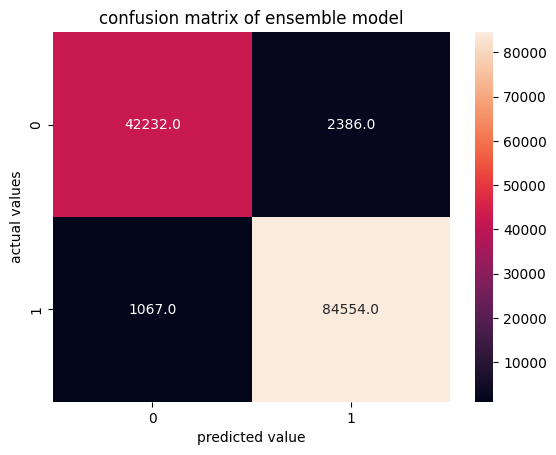

<Figure size 500x400 with 0 Axes>

In [ ]:
matrix1 = confusion_matrix(y_test, y_pred_ensemble)
matrixdf1 = pd.DataFrame(matrix1,
                        index = ['benign', 'malware'],
                        columns = ['benign', 'malware'])
sns.heatmap(matrix1, fmt = ".1f", annot = True)
plt.title('confusion matrix of ensemble model')
plt.ylabel('actual values')
plt.xlabel('predicted value')
plt.figure(figsize = (5, 4))
plt.show()

# Prediction

In [ ]:
def main(url):
    status = []
    status.append(url_length(url))
    status.append( ip_add(url))
    status.append(abnormal(url))
    status.append(count_dot(url))
    status.append(count_letters(url))
    status.append(count_digits(url))
    status.append(count_special_chars(url))
    status.append(count_www(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    status.append(shortening_service(url))
    status.append(suspicious_words(url))
    status.append(hostname_length(url))
    status.append(tld_length(url))
    status.append(fd_length(url))
    status.append(secure_http(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = ensemble_model.predict(features_test)

    if int(pred[0])==1:
        res="SAFE"
        return res

    elif int(pred[0])==0:
        res="MALWARE"
        return res

In [ ]:
urls = 'https://colab.research.google.com/drive/1qGjGDLAHCwI5lOB_Iv9hhPAhwHBotFbS#scrollTo=e6ImlvqP4rPj'
print(get_prediction_from_url(urls))

SAFE
